### 데코레이터

In [1]:
# 데코레이터는 기존 클래스나 함수에 기능을 장식한다는 뜻으로 설명 가능
# 클래스에서는 특수한 method를 구성할 때 @staticmethod, @classmethod, @abstractmethod 등을 붙여서 사용하는데
# 여기서 @로 시작하는 것 들이 데코레이터 이다. 
# 함수를 수정하지 않은 상태에서 추가 기능 구현시 사용

def trace(func):
    def wrapper():
        print(func.__name__,'함수 시작')
        func()
        print(func.__name__,'함수 종료')
        
    return wrapper

def hello():
    print('run hello function')
    
def insa():
    print('run insa function')
    
hello = trace(hello)
hello()

insa = trace(insa)
insa()

hello 함수 시작
run hello function
hello 함수 종료
insa 함수 시작
run insa function
insa 함수 종료


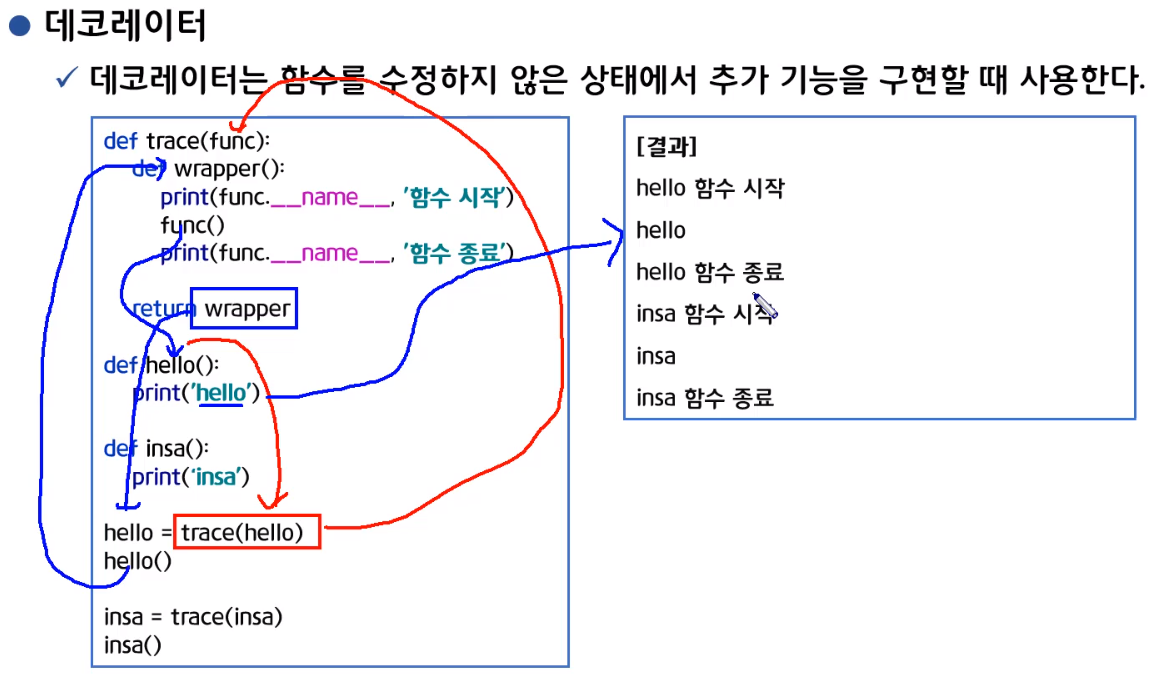

In [8]:
#위를 데코레이터로 만들 수 있다.
# @데코레이터 함수 이름 사용
def trace(func):
    def wrapper():
        print(func.__name__,'함수 시작')
        func()
        print(func.__name__,'함수 종료')
    return wrapper

@trace
def hello(): # @trace를 통해서 hello를 wrapper로 넘겨 준 것이다
    print('run hello function')

@trace
def insa():
    print('run insa function')
    
hello()
insa()

hello 함수 시작
run hello function
hello 함수 종료
insa 함수 시작
run insa function
insa 함수 종료


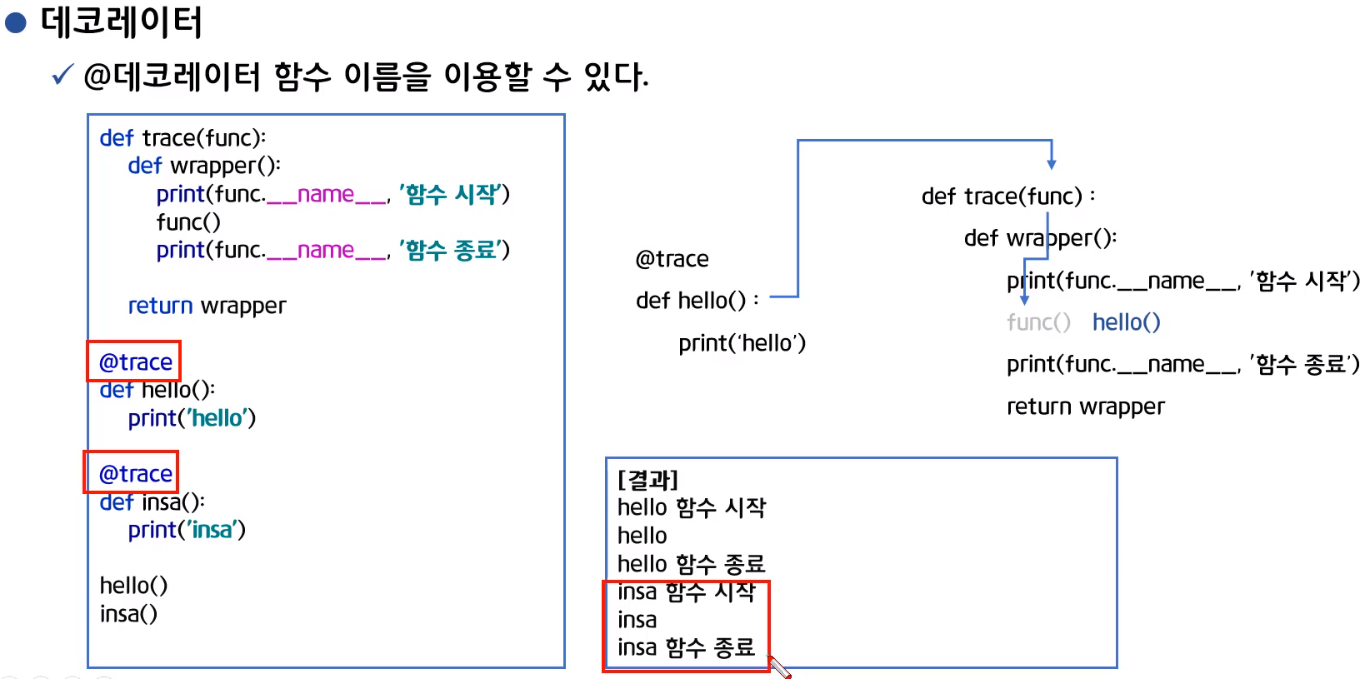

### 데코레이터 활용(함수)

In [11]:
# 매개변수와 반환 처리

def trace2(func):
    def wrapper(a, b):
        r = func(a, b)
        print('{}: a = {}, b = {} -> {}'.format(func.__name__, a, b, r))
        return r
    return wrapper

@trace2
def sum(a, b):
    return a+b

print(sum(40, 100))

sum: a = 40, b = 100 -> 140
140


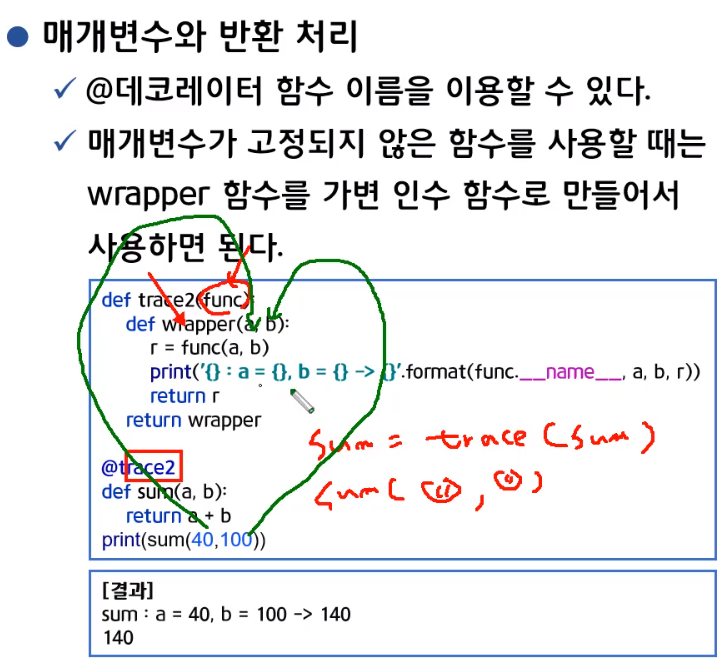

In [13]:
# 매개변수가 고정되지 않은 함수를 사용할 때는 wrapper 함수를 가변 인수 함수로 만들어서 사용하면 된다.
def trace3(func):
    def wrapper(*args, **kwargs):
        r = func(*args, **kwargs)
        print('{0}(args={1}, kwargs={2} -> {3})'.format(func.__name__, args, kwargs, r))
        return r
    return wrapper

@trace3
def get_max(*args):
    return max(args)

@trace3
def get_min(**kwargs):
    return min(kwargs.values())

print(get_max(10,20, 28, 50, 100))
print(get_min(x=10, y=40, z=5))

get_max(args=(10, 20, 28, 50, 100), kwargs={} -> 100)
100
get_min(args=(), kwargs={'x': 10, 'y': 40, 'z': 5} -> 5)
5


In [25]:
# 클레스에서도 데코레이터 사용 가능 => __call__ method를 구현해서 사용 해야 함

class CTrace:
    def __init__(self, func):
        self.func = func
        
    def __call__(self):
        print(self.func.__name__, 'function start')
        self.func()
        print(self.func.__name__, 'function end')
        
def hello():
    print('hello')
    
hello = CTrace(hello)
hello() # 이건 hello 객체의 hello.__call__()를 호출한 것과 동일한 효과

# 이렇게 해도 동일한 기능이 제공 됨
@CTrace
def hello2():
    print('hello')
hello2() 

# 이렇게 변수를 전달하면서 사용도 가능
class CTrace2:
    def __init__(self, x):
        self.x = x
        
    def __call__(self, func): #여기서 매개변수를 전달 받음
        def wrapper(a, b):
            r = func(a, b) * self.x
            print('{0} (a={1} b={2}) -> {3}'.format(func.__name__, a, b, r))
            return r
        return wrapper

@CTrace2(5) # 여기 값이 __init__ 의 x 매개변수에 들어간다
def sum(a, b):
    return a+b

@CTrace2(10) # 여기 값이 __init__ 의 x 매개변수에 들어간다
def subtract(a, b):
    return a-b
         
print(sum(20, 40)) # wrapper함수를 사용하는 것과 동일한 효과가 나옴
print(subtract(20,40))  # wrapper함수를 사용하는 것과 동일한 효과가 나옴

hello function start
hello
hello function end
hello2 function start
hello
hello2 function end
sum (a=20 b=40) -> 300
300
subtract (a=20 b=40) -> -200
-200


### 문자열 응용

In [31]:
# translate 함수는 문자열 안의 문자를 다른 문자로 변환시켜준다.
# str.maketrans('바꿀문자열','새문자열')로 변환 table로 생성 후 자리수에 맞는 문자열로 바꿔 준다.
table = str.maketrans('aeiou', '12345') # a->1, e->2, i->3, o->4, u->5
str1 = 'apple'.translate(table)
print(str1)

1ppl2


In [33]:
# 문자열 연결은 join을 사용, ''에는 리스트의 요소를 합칠 때 삽입할 문자나 문자열을 넣어 줌
data = ['red', 'blue', 'green', 'yellow']
str2 = ''.join(data)
print(str2)
str3 = '-'.join(data)
print(str3)

redbluegreenyellow
red-blue-green-yellow


In [36]:
# 특정 문자 삭제
# lstrip() 문자열 왼쪽에 있는 연속 공백 삭제
# rstrip() 문자열 오른쪽에 있는 연속 공백 삭제
# strip() 문자열 양쪽에 있는 연속 공백 삭제
# lstrip('삭제할 문자들')과 같이 삭제할 문자들을 문자열 형태로 넣어 주면  문자열 왼쪽에 있는 해당 문자를 삭제
str4 = '     hello python    '
print(str4.lstrip())
print(str4.rstrip())
print(str4.strip())

str5 = ',.hello world,.'
print(str5.lstrip(',.'))
print(str5.rstrip(',.'))
print(str5.strip(',.'))

hello python    
     hello python
hello python
hello world,.
,.hello world
hello world


In [40]:
# 문자열 정렬
# ljust(), rjust()는 문자열을 지정된 길이로 만든 뒤 각각 왼쪽, 오른쪽으로 정렬하며 남는 공간을 공백으로 채운다
# center()는 문자열을 지정된 길이로 만든 뒤 중앙으로 정렬하며 남는 공간을 공백으로 채운다
# zfill()은 지정된 길이에 맞춰서 문자열의 왼쪽에 0을 채운다
sdata = 'good day'
print(sdata.ljust(15))
print(sdata.rjust(15))
print(sdata.center(15))

sdata2 = '432'
print(sdata2.zfill(5))
print('53.56'.zfill(7))
print('string'.zfill(10))

good day       
       good day
    good day   
00432
0053.56
0000string


### 정규 표현식

In [44]:
# 정규 표현식은 문자열이 주어진 규칙에 일치하는지, 일치하지 않는지 판단할 수 있다.
# - 글자 a를 최소 한번 쓰시오
# - 그 뒤에 b는 정확히 5개 쓰고
# - 그 뒤에 c를 짝수번 쓰고
# - 마지막에 d가 있어도 되고 없어도 되고
# aaaabbbbbccccd 또는 aabbbbbcc 등ㅇ이 된다.
# = aa*bbbbb(cc)*(d|) 이렇게 쓰면 됨

아래는 이메일 정규 표현식으로 예를 나타 냄
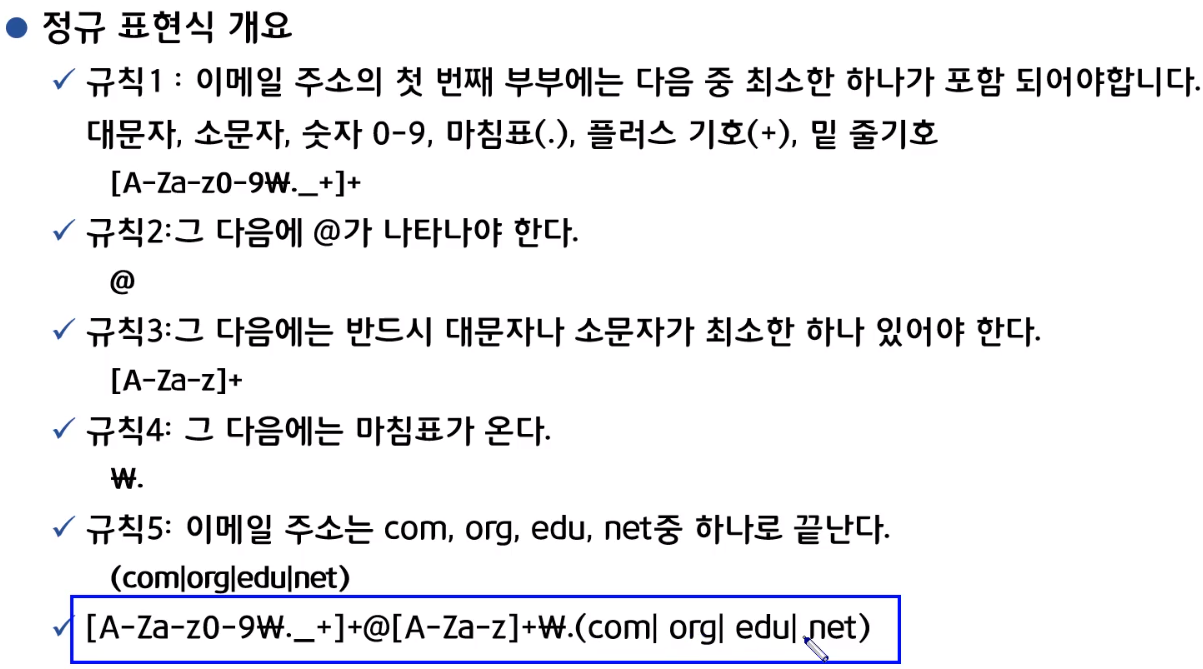

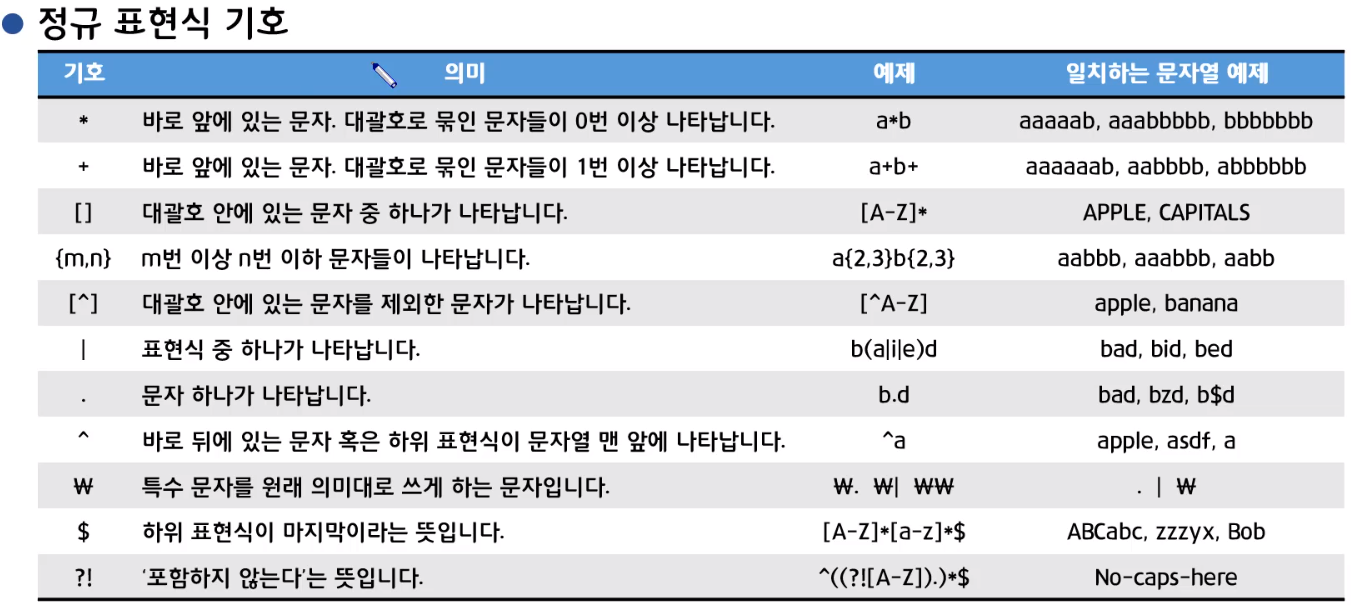

In [3]:
# 정규표현식 활용
# 파이썬에서 정규 표현식은 re 모듈을 사용한다
# complie함수는 패턴문자열을 만들어 준다. 대신해서 r''로 사용해도 된다.
# match함수는 정규표현식 패턴과 매칭되는 정보를 리턴해 준다.
# match는 찾는 string으로 시작하는 문자열의 정보를 넘겨 준다. (중간 찾기는 안됨)

import re

rc = re.compile('hello') # 아래 세 줄은 동일한 결과를 보인다.
rdata = re.match('hello', 'hello, world') # r을 생략한 형태. 이렇게도 사용 가능. 
rdata = re.match(r'hello', 'hello, world') # match로 시작점, 끝점, match되는 string들을 알려준다.
rdata = re.match(rc, 'hello, world')

print(rdata)
print(rdata.span()[0]) #match 시작점 return
print(rdata.span()[1]) #match 끝 점 return

<re.Match object; span=(0, 5), match='hello'>
0
5


In [10]:
# search 함수는 match 함수와 달리 문자열 중간 탐색도 가능
robj2 = re.search('^hello', 'hello, world')
print(robj2)
robj2 = re.search('world$', 'hello, world')
print(robj2)
robj2 = re.match('world', 'hello, world')
print(robj2)

#여러 문자열이 하나라도 포함되는지 판단해야 하면 | 연산자를 사용한다.
robj5 = re.search('hello|world', 'good world')
print(robj5)

<re.Match object; span=(0, 5), match='hello'>
<re.Match object; span=(7, 12), match='world'>
None
<re.Match object; span=(5, 10), match='world'>


In [15]:
# 정규표현식 표현
#[] 대괄호 안에 찾고자 하는 문자들을 넣는다.
#숫자 범위는 0-9처럼 표현하며 *는 문자(숫자)가 0개 이상 있는지, +는 1개 이상 있는지 판단한다

print(re.match(r'[0-9]*','121hello'))
print(re.match(r'[0-9]+','121hello'))

#*와 +활용은 아래 코드를 참고
print(re.match(r'a*b','b')) #a가 0개 이상 있고, b가 있어야 하니 b를 찾아서 정보 return 
print(re.match(r'a+b','b')) #a가 1개 이상 있고, b가 있어야 하는데 a가 없으니 None
print(re.match(r'a*b','aab'))
print(re.match(r'a+b','aab'))

<re.Match object; span=(0, 3), match='121'>
<re.Match object; span=(0, 3), match='121'>
<re.Match object; span=(0, 1), match='b'>
None
<re.Match object; span=(0, 3), match='aab'>
<re.Match object; span=(0, 3), match='aab'>


In [18]:
# ?는 ? 앞의 문자(범위) 가 0개 또는 1개인지 판단하고, .은 해당 위치에 아무 문자(또는 숫자)가 1개 있는지 판단
print(re.match(r'ab?d','abd'))
print(re.match(r'ab.d','abd'))
print(re.match(r'ab.d','abcd'))

<re.Match object; span=(0, 3), match='abd'>
None
<re.Match object; span=(0, 4), match='abcd'>


In [23]:
# {시작개수,끝개수}는 시작개수와 끝 개수를 하여 범위안에 문자열이 있는지 판단. eg. 전화번호
print(re.match(r'[0-9]{2,3}-[0-9]{3,4}-[0-9]{4}','010-8876-5454'))
print(re.match(r'[0-9]{2,3}-[0-9]{3,4}-[0-9]{4}','1-8876-5454'))
print(re.match(r'[0-9]{2,3}-[0-9]{3,4}-[0-9]{4}','02-876-5454'))

<re.Match object; span=(0, 13), match='010-8876-5454'>
None
<re.Match object; span=(0, 11), match='02-876-5454'>


In [28]:
# 영문 문자 범위는 []안에 a-z, A-Z같이 표현해 주면 된다.
# 한글을 검색하고 싶으면 [] 안에 가-힣와 같이 표현해 주면 된다.
print(re.match(r'[a-zA-Z0-9]+','everyone5656'))
print(re.match(r'[가-힣]+','안녕하세요5656'))

#특정 문자 범위에 포함되지 않는지 판단하려면 [] 안 맨 앞에 ^를 사용하면 됨
print(re.match(r'[^A-Z]+','everyONE'))
print(re.match(r'[^0-9]+','안녕하세요5456'))

<re.Match object; span=(0, 12), match='everyone5656'>
<re.Match object; span=(0, 5), match='안녕하세요'>
<re.Match object; span=(0, 5), match='every'>
<re.Match object; span=(0, 5), match='안녕하세요'>


In [36]:
# \d, \D, \w, \W를 사용하면 숫자와 문자를 판단할 때 편하게 사용 가능 
# 소문자 긍정, 대문자 부정 \d 정수인것 \D정수 아닌것 \w 문자인거 \W 문자 아닌것
print(re.match(r'\d+','324everyone'))
print(re.match(r'\D+','everyone214'))
print(re.match(r'\w+','324everyone'))
print(re.match(r'\W+','()everyone214'))

# ()를 이용하여 그룹을 지정 가능. 해당 그룹에 해당하는 문자열을 얻어 올 수 있다.
m = re.match('([0-9]+) ([0-9]+)','10 2299') # () 두개 중간에 space로 띄워줘야 space로 구분된 그룹으로 인식 
print(m.group(1))
print(m.group(2))
print(m.group(0))
print(m.group())
print(m.groups()) # 이러면 group data를 tuple형태로 가져온다

<re.Match object; span=(0, 3), match='324'>
<re.Match object; span=(0, 8), match='everyone'>
<re.Match object; span=(0, 11), match='324everyone'>
<re.Match object; span=(0, 2), match='()'>
10
2299
10 2299
10 2299
('10', '2299')


In [41]:
# findall 함수를 사용하면 패턴에 매칭되는 모든 문자열을 list로 가져올 수 있다.
fdata = re.findall('[0-9]+', '12 22 3 string python 3 44')
print(fdata)

# sub함수는 기존 문자열을 특정 문자열로 치환할 때 사용한다.
sdata = re.sub('apple|orange', 'fruit', 'apple box orange tree') # apple또는 orange를 fruit으로 치환한다
print(sdata)
sdata2 = re.sub('[0-9]+', 'num', '12 22 4 string python 3 45')
print(sdata2)

['12', '22', '3', '3', '44']
fruit box fruit tree
num num num string python num num


In [44]:
# sub함수는 바꿀 문자열 대신 함수를 이용하여 지정할 수도 있다.
def multiple(m):
    n = int(m.group()) # group 객체로 넘겨주기 때문에 group으로 뽑아서 int로 바꿔야 한다
    return str(n*10) #문자열로 바꿔서 리턴

sdata3 = re.sub('[0-9]+', multiple, '12 22 4 string python 3 82')
print(sdata3)

# 위 코드들을 람다표현식으로 나타내면아래와 같다. ㄷㄷㄷ
sdata4 = re.sub('[0-9]+', lambda m:str(int(m.group())*10), '12 22 4 string python 3 82')
print(sdata4)

120 220 40 string python 30 820
120 220 40 string python 30 820


### File

In [46]:
# 파일 읽고 쓰기 위해서는 Open함수를 이용하여 파일 객체를 생성해야 한다.
# 모드는 w또는 r로 지정
# 파일객체 사용후 종료시엔 close해야 한다.

file = open('hello.txt', 'w')
file.write('hello world!')
file.close()

file = open('hello.txt', 'r')
str = file.read()
print(str)
file.close()

hello world!


In [51]:
# 파일객체는 이터레이터를 지원한다.
# file객체 리스트로 만들 때 컴프리헨션을 이용할 수 있다.
infile = open('test.txt', 'r')
# str = infile.read()
# print(str)
# infile.close()

for line in infile:
    print(line, end='')
    
infile.close()

first
second
third
fourth
kim
lee 
choid

In [59]:
# 컴프리헨션으로 동일하게 list로 가져올 수 있다.
infile2 = open('test.txt', 'r')
# ldata = [line for line in infile2] # 이러면 \n이 포함됨
# print(ldata)

ldata2 = [line.rstrip() for line in infile2]
print(ldata2)

infile2.close()

['first', 'second', 'third', 'fourth', 'kim', 'lee', 'choid']


In [66]:
# 파이썬의 자료구조 객체를 한번에 파일에 쓰기를 하고 싶을 땐 writelines함수를 사용하면 된다.
infile = open('test.txt', 'r')
rdata = [line for line in infile]
rdata.sort(reverse=True)
outfile1 = open('wfile.txt', 'w')
outfile1.writelines(rdata)
infile.close()
outfile1.close()

routfile = open('wfile.txt', 'r')
print([line.rstrip() for line in routfile])
routfile.close()

['third', 'second', 'lee', 'kim', 'fourth', 'first', 'choid']


In [71]:
# 파이썬에서는 binary file을 읽고 쓰기를 위한 pickle 모듈을 제공한다.
# binary file을 file로 저장하는것을 피클링이라고 한다. 반대를 언피클링

# 피클링은 pickle.dump 함수를 사용한다. 데이터를 저장할 때는 open()객체를 사용할 때 'wb'로 지정해야 함
# 언피클링은 pickle.load함수를 사용한다 파일모드를 'rb'로 지정해야 한다.

import pickle

name = 'kim'
age = 20
address = 'seoul'
scores = {'korean':90, 'english':99, 'science':88}

file1 = open('p_data.p', 'wb')

pickle.dump(name, file1)
pickle.dump(age, file1)
pickle.dump(address, file1)
pickle.dump(scores, file1)

file1.close()

infile = open('p_data.p', 'rb') # binary 형태로 read
name = pickle.load(infile)
age = pickle.load(infile)
address = pickle.load(infile)
score = pickle.load(infile)

print(name, age, address, score)
infile.close()

kim 20 seoul {'korean': 90, 'english': 99, 'science': 88}


In [75]:
# 디렉터리는 os. 모듈을 사용하면 handling가능

import os
#os.mkdir('testfolder')

# 디렉토리 생성시 해당 디렉토리가 있는지 확인하고 만드는게 좋다
# os 모듈을 이용하면 존재 여부도 판단 가능
if not os.path.isdir('testfolder'):
    os.mkdir('testfolder')
    
if not os.path.exists('testfolder/newfile.txt'):
    file = open('testfolder/newfile.txt', 'w')
    file.write('hi everyone!')
    file.close()

### 예외 처리

In [79]:
# 예외처리 기본 문법은 try-except 문입니다.

#error1 = 10/0 #ZeroDivisionError: division by zero

# 예
for i in range(5):
    try:
        result =  10/i
        print(result)
    except ZeroDivisionError:
        print('숫자는 0으로 나눌 수 없습니다.')

숫자는 0으로 나눌 수 없습니다.
10.0
5.0
3.3333333333333335
2.5


In [82]:
# 예외처리는 여러개 처리가 그낭
# 예외와 상관없이 특정 코드를 실행하려면 finally 를 사용하면 된다.

y = [10, 20, 30]
try:
    index, x = map(int, input('input index and number: ').split())
    print(y[index] / x)

except ZeroDivisionError as e:
    print('숫자는 0으로 나눌수 없음.', e)
except IndexError as e:
    print('wrong index.', e)

input index and number: 4 0
wrong index. list index out of range


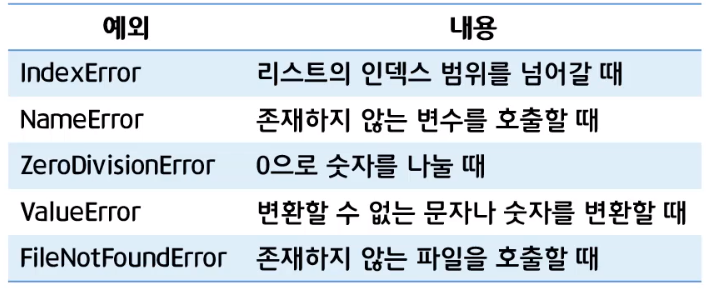

In [85]:
# try-except-else 문은 if-else와 비슷. 예외가 발생하지 않을 경우 수행할 코드를 else에 작성하면 된다.
# try-except-finally 에서 finally는 try-except문 안에 있는 수행 코드가 아무런 문제가 없이 종료 되었을 경우 최종적으로 호출 됨
for i in range(5):
    try:
        result = 10 / i
    except ZeroDivisionError:
        print('숫자는 0으로 못 나눔')
    else:
        print('result:', i)
    finally:
        print('항상 실행')

숫자는 0으로 못 나눔
항상 실행
result: 1
항상 실행
result: 2
항상 실행
result: 3
항상 실행
result: 4
항상 실행


In [88]:
# raise문은 예외를 강제로 발생할 때 사용하는 코드
idata = input('정수를 입력해 주세요:')
if not idata.isdigit():
    raise ValueError('정수를 입력하지 않았습니다.')
print(int(idata))

정수를 입력해 주세요:ㄱ


ValueError: 정수를 입력하지 않았습니다.

In [1]:
# 커스텀 예외 생성 가능 
# Exceptino을 상속받아서 새로운 클래스를 만들면 된다.
class NotThreeMError(Exception):
    def __init__(self):
        super().__init__('입력된 값의 3의 배수가 아닙니다.')
        
def t_multiple():
    try:
        x = int(input('3의 배수를 입력하세요: '))
        if x%3 != 0:
            raise NotThreeMError
        print(x)
    except NotThreeMError as e:
        print('예외 발생!', e)
        
t_multiple()

3의 배수를 입력하세요: 2
예외 발생! 입력된 값의 3의 배수가 아닙니다.


In [6]:
infile = open('words.txt', 'r')
for data in infile:
    print(data, end="")
infile.close()

complex
excute
sports
photo
danger
python
generator


### numpy

다차원 배열 자료구조인 ndarray 지원 (n dimension array)
수치 데이터의 벡터 연산과 여러 수치 연산함수를 지원
데이터의 연산을 간결하게 할 수 있는 구조 제공
선형대수를 지원하면 각종 난수도 발생 가능

데이터 분석을 위한 중요 기능을 제공
- 벡터 배열 상태에서 데이터 개조, 정제, 부분 집합 필터링
- 정렬, 유일 원소 찾기, 집합연산 같은 일반적인 배열 처리 알고리즘
- 통계의 효과적인 표현과 데이터의 수집과 요약

In [9]:
# ndarray 객체 생성 방법
# numpy.array()를 이용하여 ndarray(배열화 객체)를 생성가능
# ndarry의 크기와 데이터 타입은 shape과 dtype을 통해 알 수 있다

import numpy as np

data1 = [6, 7.5, 6, 0, 1]
arr1 = np.array(data1)
print(arr1) # 같은 data type으로 몯 변환 / list 내에서 ,로 나뉘어 있지 않음
print(data1)

data2 = [[1,2,3,4],[5,6,7,8]]
arr2 = np.array(data2)
print(arr2)

print(arr2.shape)
print(arr2.dtype)

[6.  7.5 6.  0.  1. ]
[6, 7.5, 6, 0, 1]
[[1 2 3 4]
 [5 6 7 8]]
(2, 4)
int32


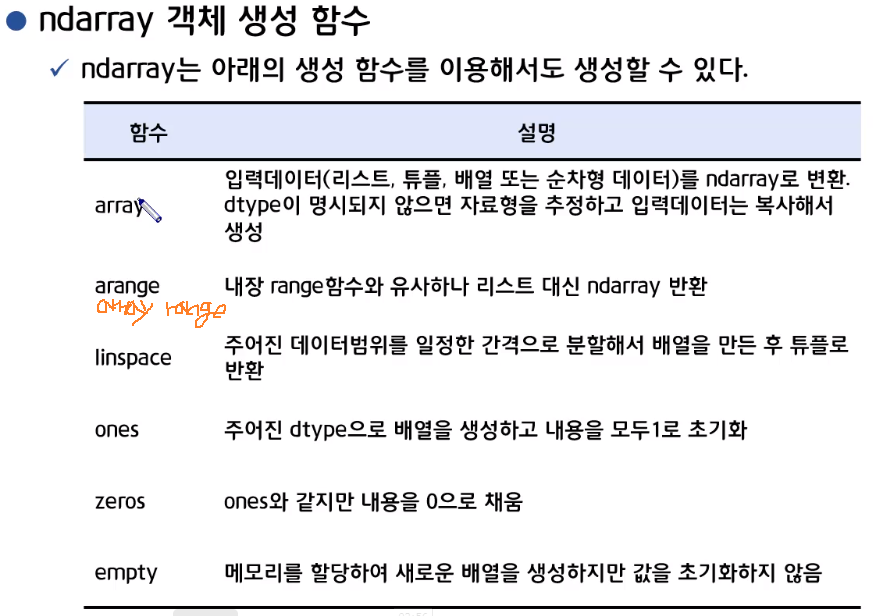

In [14]:
import numpy as np

arr1 = np.arange(1, 10, 2) # (시작, 끝, 간격)
print(arr1)

arr2 = np.linspace(-2, 2, 4)
print(arr2)

arr3 = np.ones([2,3])
print(arr3)

arr4 = np.zeros([2,3])
print(arr4)

[1 3 5 7 9]
[-2.         -0.66666667  0.66666667  2.        ]
[[1. 1. 1.]
 [1. 1. 1.]]
[[0. 0. 0.]
 [0. 0. 0.]]


In [17]:
# 스칼라연산과 ndarry 연산
# for 반복을 하지 않고 데이터를 일괄 처리 가능
# 스칼라 연산을 ndarry에 적용하면 모든 요소에 연산이 이루어진다
# 같은 크기의 배열 간 산술연산은 배열의 각 요소단위로 적용된다.
import numpy as np
arr = np.array([[1, 2, 3], [4, 5, 6]])
print(arr)
print(arr/2)
print(arr*arr)
print(arr-arr)

arr2 = np.array([[9., 4., 1.],[7., 2., 12.]])
print(arr2 > arr)

[[1 2 3]
 [4 5 6]]
[[0.5 1.  1.5]
 [2.  2.5 3. ]]
[[ 1  4  9]
 [16 25 36]]
[[0 0 0]
 [0 0 0]]
[[ True  True False]
 [ True False  True]]


In [21]:
# ndarry 인덱싱
# 1차원 ndarray의 인덱싱은 python 시퀀스 객체의 인덱싱과 유사
# 다차원 ndarray는 [l,j], 형태로 인덱싱 가능 [행,열]
# ndarry는 boolean 색인 지원

import numpy as np

arr = np.arange(10)
print(arr[5])
print(arr[5:8])
arr[5:8] = 12
print(arr)

arr = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(arr[:2])
print(arr[:2, 1:])

arr2 = np.array([[True, False, False], [True, False, True], [False, True, False, ]])
print(arr[arr2])

5
[5 6 7]
[ 0  1  2  3  4 12 12 12  8  9]
[[1 2 3]
 [4 5 6]]
[[2 3]
 [5 6]]
[1 4 6 8]


In [25]:
# 재형성
# ndarray는 데이터를 복사하지 않고 다른 모양으로 바꿀 수 있는 reshape()을 제공

import numpy as np
arr = np.arange(8) # [01,2,3,4,5,6,7]
arr2 = arr.reshape((4,2))
print(arr2)

arr3 = arr.reshape((4,2)).reshape((2,4)) # 바꾼거 또 바꿀수도 있음
print(arr3)

[[0 1]
 [2 3]
 [4 5]
 [6 7]]
[[0 1 2 3]
 [4 5 6 7]]


In [27]:
# sort 가능
arr = np.array([2, 5, 9, 1, 3, 7])
arr.sort()
print(arr)

[1 2 3 5 7 9]


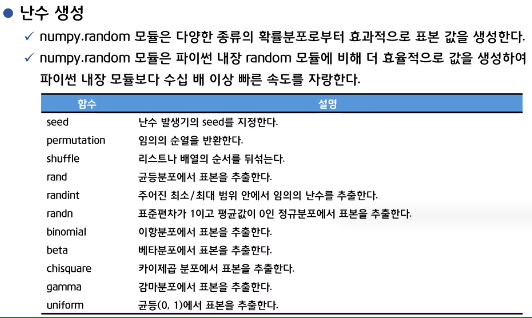

In [30]:
import numpy as np

np.random.seed(123)

data1 = np.random.randn(4,5) # 데이터의 shape
data1

array([[-1.0856306 ,  0.99734545,  0.2829785 , -1.50629471, -0.57860025],
       [ 1.65143654, -2.42667924, -0.42891263,  1.26593626, -0.8667404 ],
       [-0.67888615, -0.09470897,  1.49138963, -0.638902  , -0.44398196],
       [-0.43435128,  2.20593008,  2.18678609,  1.0040539 ,  0.3861864 ]])

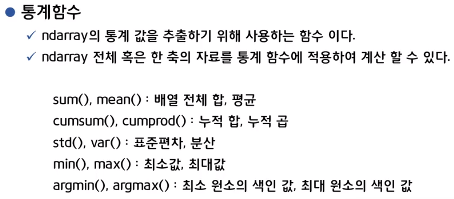

In [38]:
import numpy as np

arr = np.random.randn(5,4) # 데이터의 shape
print(arr)
print('mean', np.mean(arr))
print('sum', np.sum(arr))

# 축 변경
print(arr.mean(axis=1)) # 각 행의 평균 
print(arr.sum(axis=0)) # 각 열의 합

arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
print(arr.cumsum()) # 누적합 구할 때 씀

arr = np.array([[0, 1, 2],
             [3, 4, 5],
             [6, 7, 8]])

print(arr.cumsum(axis=0))
print(arr.cumprod(axis=1)) # 누적곱

[[ 0.020316   -0.19396387  0.13402679  0.70447407]
 [ 0.66565344 -0.89842294  1.52366378 -1.09502646]
 [ 0.07922701 -0.27439657 -1.04899168 -0.07512059]
 [-0.74081377  0.07290724  0.40308596  1.47192937]
 [ 0.30738422 -0.61122534 -0.39161981  0.13997811]]
mean 0.009653247999818334
sum 0.1930649599963667
[ 0.16621325  0.04896695 -0.32982046  0.3017772  -0.13887071]
[ 0.3317669  -1.90510148  0.62016504  1.1462345 ]
[ 0  1  3  6 10 15 21 28]
[[ 0  1  2]
 [ 3  5  7]
 [ 9 12 15]]
[[  0   0   0]
 [  3  12  60]
 [  6  42 336]]


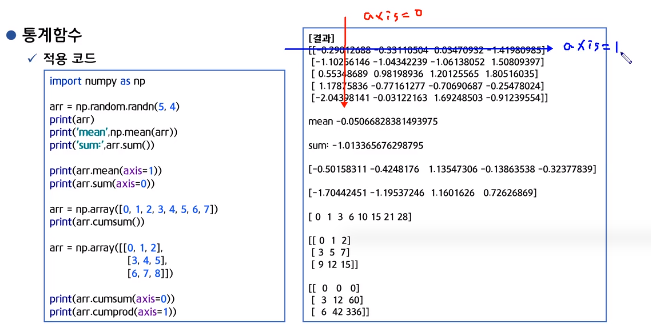

### pandas

numpy base로 만들어 진 데이터 조작 및 분석을 위한 고수준 자료구조 lib
- 축의 정보를 이용하여 데이터를 추출 및 정렬할 수 있는 자료구조 제공
- 데이터 그룹화를 이용한 데이터 처리 기능 제공
- 시계열 데이터 처리 기능 제공
- 누락된 데이터를 유연하게 처리
- SQL과 같은 일반 데이터베이스처럼 데이터를 합치고 관계 연산을 수행할 수 있다.

In [8]:
# Series
# 일련의 객체를 담을 수 있는 1차원 배열 구조. index를 자동으로 생성해 준다.
# 딕셔너리와 유사하나 index는 중복 가능

import pandas as pd
import numpy as np

obj = pd.Series([4, 7, -5, 3])
print(obj)
print(obj.values)

obj2 = pd.Series([4, 7, -5, 3], index=['a', 'b', 'a', 'c'])
print(obj2)
print('1-----------------------------')
print(obj2['a']) #딕셔너리 처럼 쓰면 됨
obj2['d'] = 6
print(obj2)
print('2-----------------------------')
print(obj2[['c','a','d']]) # 순서 바꿔서 찍을 수 있다
print('3-----------------------------')
print(obj2>0)
print(obj2[obj2>0]) # True인 애들만 가져온다
print(obj2*2)
print(np.exp(obj2))
print('4-----------------------------')
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = pd.Series(sdata) # dictionary를 Series형태로 바로 변환 가능 key는 index로
print(obj3)

0    4
1    7
2   -5
3    3
dtype: int64
[ 4  7 -5  3]
a    4
b    7
a   -5
c    3
dtype: int64
1-----------------------------
a    4
a   -5
dtype: int64
a    4
b    7
a   -5
c    3
d    6
dtype: int64
2-----------------------------
c    3
a    4
a   -5
d    6
dtype: int64
3-----------------------------
a     True
b     True
a    False
c     True
d     True
dtype: bool
a    4
b    7
c    3
d    6
dtype: int64
a     8
b    14
a   -10
c     6
d    12
dtype: int64
a      54.598150
b    1096.633158
a       0.006738
c      20.085537
d     403.428793
dtype: float64
4-----------------------------
Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64


### Dataframe

- 표 같은 스프레드시트 형식의 자료 구조로 여러개의 컬럼이 있는데 서로다른 종류의 값을 담을 수 있다.
- DataFrame은 색인 모양이 여러개의 Series 객체를 담고 있다고 생각하면 된다.
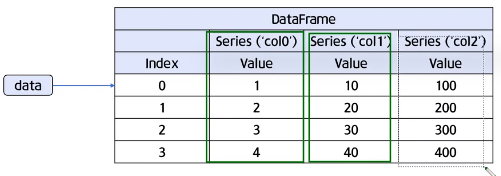

In [21]:
import pandas as pd
import numpy as np

frame1 = pd.DataFrame(np.arange(6).reshape(2,3), 
            index = ['first', 'second'], 
            columns = ['one', 'two', 'three'])
print(frame1)
print('1---------------------------')

data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
       'year': [2000, 2001, 2002, 2001, 2002, 2003], 
       'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
print(pd.DataFrame(data, columns=['year', 'state', 'pop']))
print('2---------------------------')
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop'],
                     index=['one', 'two', 'three', 'four', 'five', 'six'])
print(frame2)
print('3---------------------------')
print(frame2.columns) # Index(['year', 'state', 'pop'], dtype='object') 가 출력 됨
print(frame2['state']) # 'state'에 해당하는 시리즈 출력됨
print(frame2.year) # print(frame2['year']) 열로 접근할 때는 .으로 정보를 가져올 수 있다.
print(frame2.loc['three']) # print(frame2['three']) 로 쓰면 KeyError: 'three' 발생

        one  two  three
first     0    1      2
second    3    4      5
1---------------------------
   year   state  pop
0  2000    Ohio  1.5
1  2001    Ohio  1.7
2  2002    Ohio  3.6
3  2001  Nevada  2.4
4  2002  Nevada  2.9
5  2003  Nevada  3.2
2---------------------------
       year   state  pop
one    2000    Ohio  1.5
two    2001    Ohio  1.7
three  2002    Ohio  3.6
four   2001  Nevada  2.4
five   2002  Nevada  2.9
six    2003  Nevada  3.2
3---------------------------
Index(['year', 'state', 'pop'], dtype='object')
one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object
one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64
year     2002
state    Ohio
pop       3.6
Name: three, dtype: object


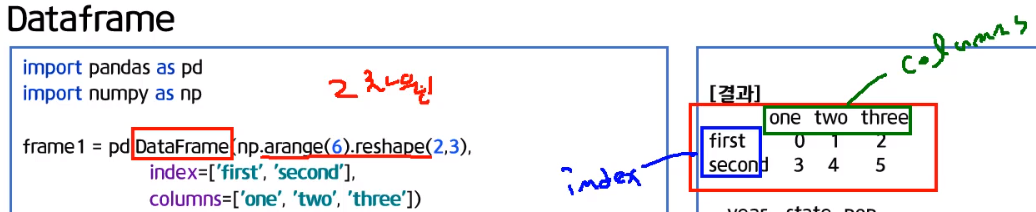

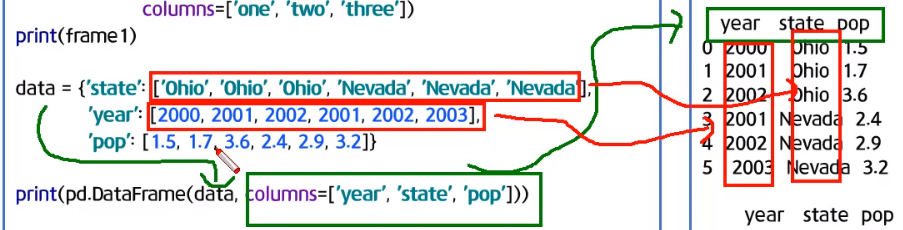

In [39]:
# 인덱싱
# Series와 Dataframe의 색인은 index와 column정보 외에도 numpy 배열의 색인과 유사하게 배열 인덱스를 이용할 수 있다.
import pandas as pd
import numpy as np

obj = pd.Series([4, 2, 6, 9], index=list('abcd'))
print(obj)
print(obj['b'])
print(obj[1])
print(obj[1:3])
print(obj['b':'c'])
print('1---------------------------')

frame = pd.DataFrame(np.arange(16).reshape(4,4), 
                    index=['Ohio', 'Colorado', 'Utah', 'NewYork'],
                    columns=['one', 'two', 'three', 'four'])
print(frame)
print('2---------------------------')
print(frame.iloc[2, [3,0,1]]) #앞에 2는 행기준 index이다.

print('3---------------------------')
print(frame[frame['three'] >5])
print(frame.loc[:'Utah', 'two'])
print('4---------------------------')
print(frame.three>5)
print(frame.iloc[:, :3][frame.three>5]) # True인 행만 가져온다
#이런 식으로 섞어서 사용이 가능하다

a    4
b    2
c    6
d    9
dtype: int64
2
2
b    2
c    6
dtype: int64
b    2
c    6
dtype: int64
1---------------------------
          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
NewYork    12   13     14    15
2---------------------------
four    11
one      8
two      9
Name: Utah, dtype: int32
3---------------------------
          one  two  three  four
Colorado    4    5      6     7
Utah        8    9     10    11
NewYork    12   13     14    15
Ohio        1
Colorado    5
Utah        9
Name: two, dtype: int32
4---------------------------
Ohio        False
Colorado     True
Utah         True
NewYork      True
Name: three, dtype: bool
          one  two  three
Colorado    4    5      6
Utah        8    9     10
NewYork    12   13     14


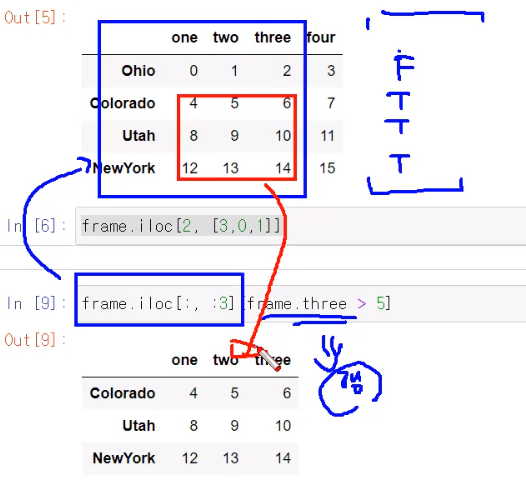

산술연산
- pandas에서 중요한 기능은 색인이 다른 객체간의 산술연산이다. 객체를 연산할 때 크기가 맞지 않는다면 한쪽의 크기에 맞춰 연산이 진행된다.
- 일반적인 연산 방법은 모자란 부분을 nan으로 채워서 연산을 진행
- 산술 함수를 이용하면 fill_value를 이용하여 없는 부분을 특정한 값으로 채울 수 있다.

In [51]:
import pandas as pd
import numpy as np

df1 = pd.DataFrame(np.arange(12).reshape((3,4)),
                  columns=list('abcd'))
df2 = pd.DataFrame(np.arange(20).reshape((4,5)),
                  columns=list('abcde'))

print(df1)
print(df2)

print(df1+df2)
print(df1.add(df2, fill_value=2))

   a  b   c   d
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11
    a   b   c   d   e
0   0   1   2   3   4
1   5   6   7   8   9
2  10  11  12  13  14
3  15  16  17  18  19
      a     b     c     d   e
0   0.0   2.0   4.0   6.0 NaN
1   9.0  11.0  13.0  15.0 NaN
2  18.0  20.0  22.0  24.0 NaN
3   NaN   NaN   NaN   NaN NaN
      a     b     c     d     e
0   0.0   2.0   4.0   6.0   6.0
1   9.0  11.0  13.0  15.0  11.0
2  18.0  20.0  22.0  24.0  16.0
3  17.0  18.0  19.0  20.0  21.0


In [52]:
# pandas에서는 정렬하기 위한 두 함수를 제공
# sort_index함수는 인덱스를 기준으로 정렬하며 이 때 축도 같이 이동을 한다. (데이터 같이 이동)
# Dataframe을 정렬할 때는 axis를 이용하여 인덱스 또는 컬럼 기준으로 정렬을 할 수 있다.
import numpy as np
import pandas as pd

obj = pd.Series(np.arange(4), index=list('dabc'))
print(obj)
print(obj.sort_index())

frame = pd.DataFrame(np.arange(8).reshape(2,4),
                    index=['three', 'one'],
                    columns=list('dabc'))
print(frame)
print('1--------------------------')
print(frame.sort_index(axis=1)) #axis=1: 행
print('2--------------------------')
print(frame.sort_index(axis=1, ascending=False)) #axis=1: 행
print('3--------------------------')
print(frame.sort_index(axis=0)) #axis=0: 열


d    0
a    1
b    2
c    3
dtype: int32
a    1
b    2
c    3
d    0
dtype: int32
       d  a  b  c
three  0  1  2  3
one    4  5  6  7
1--------------------------
       a  b  c  d
three  1  2  3  0
one    5  6  7  4
2--------------------------
       d  c  b  a
three  0  3  2  1
one    4  7  6  5
3--------------------------
       d  a  b  c
one    4  5  6  7
three  0  1  2  3


In [66]:
# sort_value 함수는 value 값을 기준으로 정렬하며, 이 떄 축도 같이 이동을 한다.
# Dataframe을 정렬할 때는 'by='를 이용하여 기준값을 지정하여 정렬시킨다

import numpy as np
import pandas as pd

obj2 = pd.Series([4, 7, -5, 3])
print(obj2.sort_values()) # value기준으로 sorting index도 같이 움직이는걸 볼 수 있다.

data={'b':[4, 7, -3, 2], 'a':[0, 1, 0, 1]}
frame2 = pd.DataFrame(data)
print(frame2)
print('1-------------------')

print(frame2.sort_values(by='b'))
print('2-------------------')
print(frame2.sort_values(by=['a','b'])) # a기준 정렬 후 b기준 정렬

2   -5
3    3
0    4
1    7
dtype: int64
   b  a
0  4  0
1  7  1
2 -3  0
3  2  1
1-------------------
   b  a
2 -3  0
3  2  1
0  4  0
1  7  1
2-------------------
   b  a
2 -3  0
0  4  0
3  2  1
1  7  1


### 기술 통계와 누락처리
기술 통계
- pandas 객체는 수학 메서드와 통계 메서드를 제공
- numpy 배열에서 제공하는 함수와 비슷하지만 pandas의 함수에는 누락된 데이터를 제외하는 기능이 추가되어 있다.
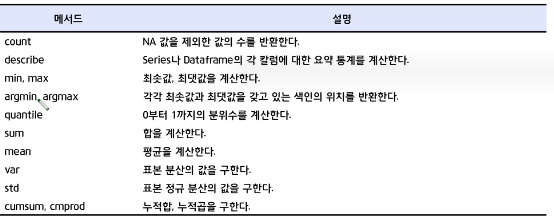

In [71]:
import pandas as pd
import numpy as np

np.random.seed(12345)
frame = pd.DataFrame(np.random.randn(4,2),
                    index=list('abcd'),
                    columns=['one', 'two'])

frame

,one,two
a,-0.204708,0.478943
b,-0.519439,-0.555730
c,1.965781,1.393406
d,0.092908,0.281746


In [73]:
frame.sum(axis=0) #axis=0은 column(세로)기준

one    1.334542
two    1.598365
dtype: float64

In [75]:
frame.mean(axis=1) #가로방향 평균

a    0.137118
b   -0.537585
c    1.679593
d    0.187327
dtype: float64

In [77]:
frame.describe() # 통계 예약값들을 쭉 보여준다. 

,one,two
count,4.000000,4.000000
mean,0.333636,0.399591
std,1.116452,0.800102
min,-0.519439,-0.555730
25%,-0.283390,0.072377
50%,-0.055900,0.380345
75%,0.561126,0.707559
max,1.965781,1.393406


누락처리
- pandas의 설계 목표중 하나는 누락데이터를 가능한 쉽게 처리 할수 있도록 하는 것
- pandas는 누락된 데이터는 모두 NaN(Not a Number)로 취급함
- NA 처리 메서드는 아래 표와 같다
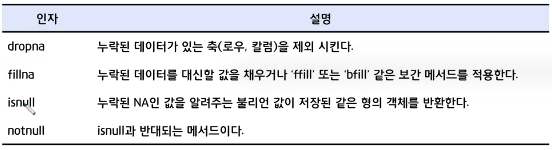

In [83]:
# 누락된 값이 있는 값을 제거하고 싶을 땐 dropna함수를 씀녀 된다
# 누락된 값을 제외시키지 않고 메우고 싶은 경우 fillna 함수를 쓰면 된다.

import pandas as pd
import numpy as np

data = pd.Series([1, np.nan, 3.5, np.nan, 7])
print(data)
print(data.dropna())

print('1----------------------')

np.random.seed(12345)
frame = pd.DataFrame(np.random.randn(7,3))
frame.iloc[:4, 1] = np.nan
frame.iloc[:2, 2] = np.nan
print(frame)
print('2----------------------')
print(frame.fillna(0))

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64
0    1.0
2    3.5
4    7.0
dtype: float64
1----------------------
          0         1         2
0 -0.204708       NaN       NaN
1 -0.555730       NaN       NaN
2  0.092908       NaN  0.769023
3  1.246435       NaN -1.296221
4  0.274992  0.228913  1.352917
5  0.886429 -2.001637 -0.371843
6  1.669025 -0.438570 -0.539741
2----------------------
          0         1         2
0 -0.204708  0.000000  0.000000
1 -0.555730  0.000000  0.000000
2  0.092908  0.000000  0.769023
3  1.246435  0.000000 -1.296221
4  0.274992  0.228913  1.352917
5  0.886429 -2.001637 -0.371843
6  1.669025 -0.438570 -0.539741


### matplotlib
데이터 시각화 작업은 데이터 분석시 매우 중요
- 특이 값을 찾아낼 수 있다.
- 데이터 변형이 필요한 지점을 확인할 수 있다.

matplotlib은 데이터를 시각화 하기 쉽게 구성된 파이썬의 대표적인 lib이다.
matplotlib은 다양한 그래프를 제공하며 pandas의 자료구조와 뎐동할 수 있는 기능을 가지고 있다.
matplotlib은 다양한 GUI 백 엔드를 지원하고 있으며, pdf, svg, jpg, png, gif등 일반적ㅇ로 널리 사용되는 포맷으로 도표를 저장할 수있다.


그래프
- matplotlib은 그래프를 설정하기 위해 pyplot의 다양한 함수를 이용 가능
- pyplot.title(): 그래프 제목 설정
- pyplot.plot(): 선 그래프를 그리기 위한 데이터 정보와 선 그래프의 설정을 할 수 있다.
- pyplot.show(): 이전에 설정한 그래프를 도식화 한다.

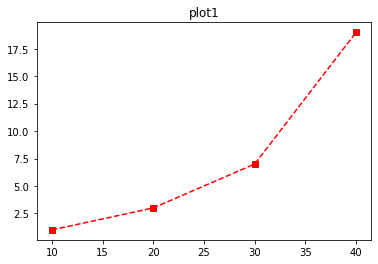

In [90]:
import matplotlib.pyplot as plt
import numpy as np

plt.title('plot1')
plt.plot([10, 20, 30, 40], [1, 3, 7, 19], 'rs--') # 앞 데이터는 x축 뒤 데이터는 y축 , r=red, s=square marker, -- => 점선 아래 그림 참고
plt.show()

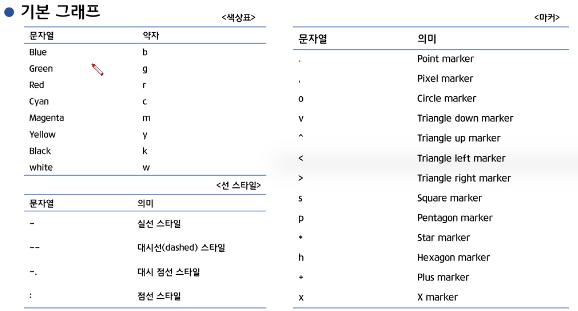

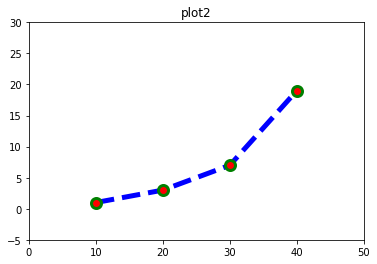

In [93]:
# 축약 방법 외에도 명시적인 형태로 선 그래프를 지정하여 사용할 수 있다.
import matplotlib.pyplot as plt
import numpy as np

plt.title('plot2')
plt.plot([10, 20., 30, 40], [1, 3, 7, 19], c='b', lw=5, ls='--', marker='o', ms=10, mec='g', mew='3', mfc='r')
plt.xlim(0, 50)
plt.ylim(-5, 30)
plt.show()

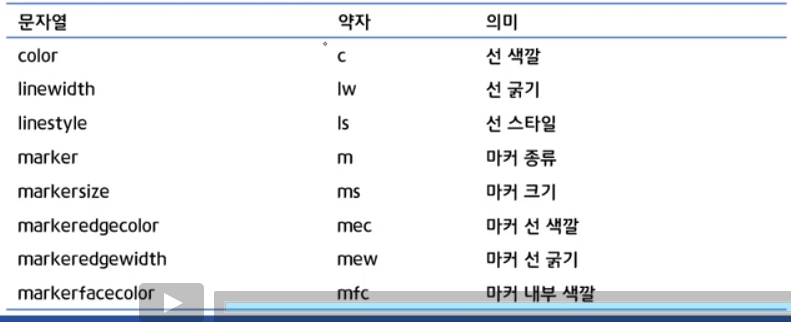

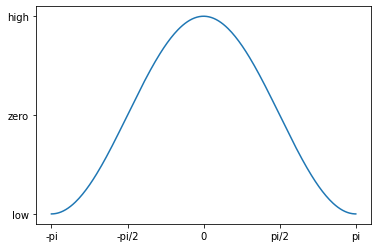

In [97]:
# xticks, yticks를 이용하여 tick을 설정할 수 있다. (x, y축 눈금점)

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-np.pi, np.pi, 256) # -pi~pi사이에 256개 값을 생성
y = np.cos(x)
plt.plot(x, y)

# 중요 tick만 설정하여 보이게 한다.
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], 
          ['-pi', '-pi/2', '0', 'pi/2', 'pi'])
plt.yticks([-1, 0, 1], ['low', 'zero', 'high']) # -1을 low에 매칭, 0은 zero, 1은 high에 매칭
plt.show()

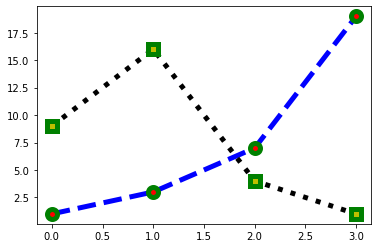

In [101]:
# 여러개의 그래프 그리기
# 한 공간에 여러개 그래프 그리려면 그래프 수 만큼 plot함수를 설정하여 그리면 된다.
import matplotlib.pyplot as plt
import numpy as np

plt.plot([1,3,7,19], c='b', lw=5, ls='--', marker='o', ms=10, mec='g', mew=5, mfc='r')
plt.plot([9,16,4,1], c='k', lw=5, ls=':', marker='s', ms=10, mec='g', mew=5, mfc='y')
plt.show()

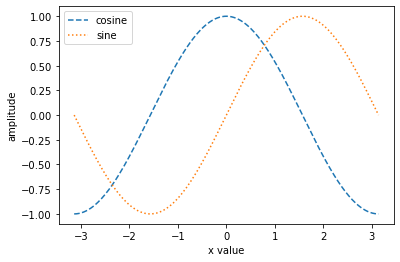

In [104]:
# 여러개 그려졌을 때 각 선이 어떤 자료를 표시하는지 보여주기 위해 legend(범례) 함수를 이용하여 추가할 수 있다.
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-np.pi, np.pi, 256)
c, s = np.cos(x), np.sin(x)

plt.plot(x, c, ls='--', label='cosine')
plt.plot(x, s, ls=':', label='sine')
plt.legend(loc=2)
plt.xlabel('x value')
plt.ylabel('amplitude')
plt.show()


plt.legend(loc=2) 여기 숫자는 아래 참고
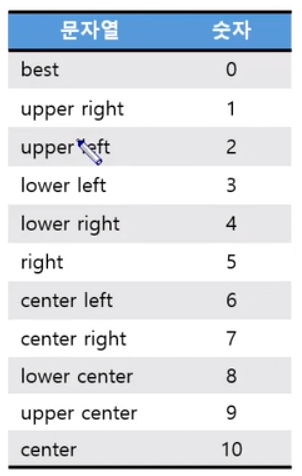

<function matplotlib.pyplot.show(close=None, block=None)>

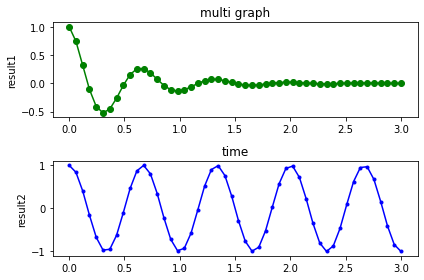

In [107]:
# 여러개의 공간에 그래프 그리기 => 공간을 나누어 사용해야 한다.
# subplot(nrow, ncol, index)를 이용해서 여러개로 나눌 수 있다.

import matplotlib.pyplot as plt
import numpy as np

x1 = np.linspace(0.0, 3.0)
x2 = np.linspace(0.0, 3.0)
y1 = np.cos(3*np.pi*x1) * np.exp(-2*x1)
y2 = np.cos(3*np.pi*x2)

plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'go-')
plt.title('multi graph')
plt.ylabel('result1')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, 'b.-')
plt.title('time')
plt.ylabel('result2')

plt.tight_layout()
plt.show

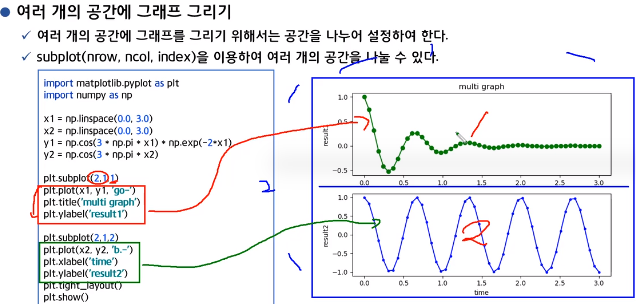